# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
units = "metric"

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [89]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as err:
        print('ERR:', err)
        print("City not found. Skipping...")
        pass
              
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yuzhno-kurilsk
Processing Record 2 of Set 1 | kencong
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | tsiombe
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | jebrail
Processing Record 9 of Set 1 | kresttsy
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | saratamata
ERR: 'coord'
City not found. Skipping...
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | harbin
Processing Record 16 of Set 1 | quellon
Processing Record 17 of Set 1 | alaghsas
Processing Record 18 of Set 1 | aioun
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of 

Processing Record 39 of Set 4 | puerto deseado
Processing Record 40 of Set 4 | labuan
Processing Record 41 of Set 4 | sechura
Processing Record 42 of Set 4 | kryvyi rih
Processing Record 43 of Set 4 | nemuro
Processing Record 44 of Set 4 | anadyr
Processing Record 45 of Set 4 | lerwick
Processing Record 46 of Set 4 | pandan
Processing Record 47 of Set 4 | happy valley-goose bay
Processing Record 48 of Set 4 | iskateley
Processing Record 49 of Set 4 | lashkar gah
Processing Record 0 of Set 5 | kapuskasing
Processing Record 1 of Set 5 | forio
Processing Record 2 of Set 5 | coahuayana de hidalgo
Processing Record 3 of Set 5 | minas de marcona
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | labytnangi
Processing Record 6 of Set 5 | punta arenas
Processing Record 7 of Set 5 | oriximina
Processing Record 8 of Set 5 | aykhal
Processing Record 9 of Set 5 | slavyanka
Processing Record 10 of Set 5 | kiama
Processing Record 11 of Set 5 | antalaha
Processing Record 12 of Set 5 |

Processing Record 29 of Set 8 | luanda
Processing Record 30 of Set 8 | porto murtinho
Processing Record 31 of Set 8 | deridder
Processing Record 32 of Set 8 | vadso
Processing Record 33 of Set 8 | gramoteino
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | rio grande
Processing Record 36 of Set 8 | badger
Processing Record 37 of Set 8 | libreville
Processing Record 38 of Set 8 | tralee
Processing Record 39 of Set 8 | duncan
Processing Record 40 of Set 8 | susuman
Processing Record 41 of Set 8 | taoudenni
Processing Record 42 of Set 8 | tira sujanpur
Processing Record 43 of Set 8 | axim
Processing Record 44 of Set 8 | belyy yar
Processing Record 45 of Set 8 | yarkovo
Processing Record 46 of Set 8 | urangan
Processing Record 47 of Set 8 | toliara
Processing Record 48 of Set 8 | sinop
Processing Record 49 of Set 8 | i-n-salah
Processing Record 0 of Set 9 | solleftea
Processing Record 1 of Set 9 | cairns city
ERR: 'coord'
City not found. Skipping...
Processing Record 

In [90]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [91]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yuzhno-kurilsk,44.0306,145.8556,14.60,97,99,4.12,RU,1690057696
1,kencong,-8.2833,113.3667,20.96,85,81,1.60,ID,1690057696
2,udachny,66.4167,112.4000,20.25,55,12,3.99,RU,1690057696
3,iqaluit,63.7506,-68.5145,7.85,87,100,2.06,CA,1690057697
4,hamilton,39.1834,-84.5333,29.87,48,0,3.60,US,1690057474


In [92]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [93]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yuzhno-kurilsk,44.0306,145.8556,14.60,97,99,4.12,RU,1690057696
1,kencong,-8.2833,113.3667,20.96,85,81,1.60,ID,1690057696
2,udachny,66.4167,112.4000,20.25,55,12,3.99,RU,1690057696
3,iqaluit,63.7506,-68.5145,7.85,87,100,2.06,CA,1690057697
4,hamilton,39.1834,-84.5333,29.87,48,0,3.60,US,1690057474


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

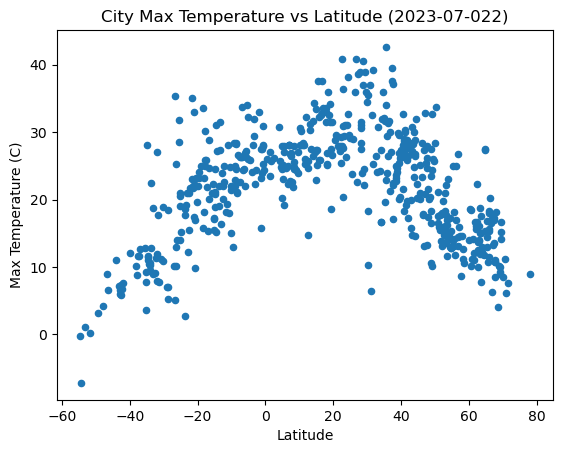

In [94]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat","Max Temp")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Temperature vs Latitude (2023-07-022)");

# Save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

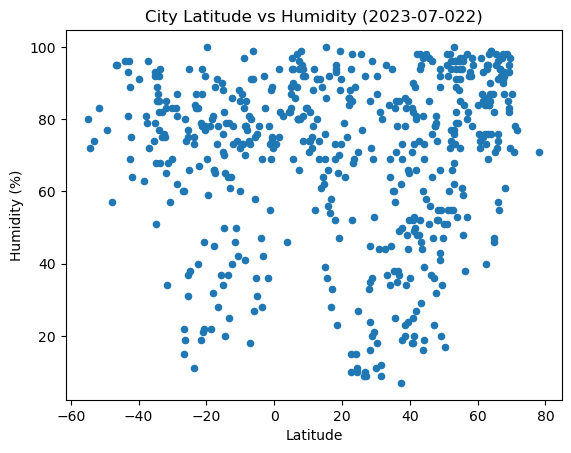

In [95]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter("Lat","Humidity")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-07-022)");

# Save the figure
plt.savefig("output_data/Fig2.png")

#### Latitude Vs. Cloudiness

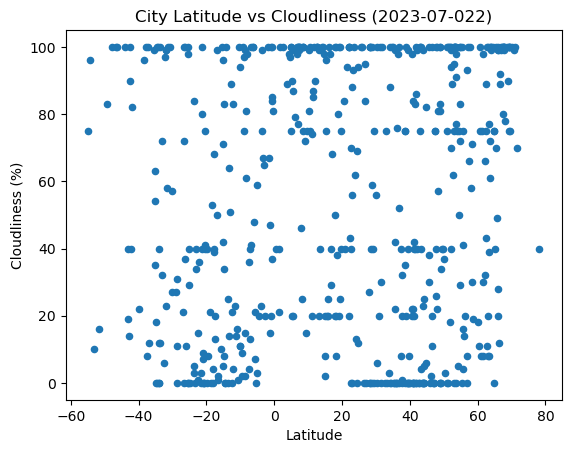

In [88]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter("Lat","Cloudiness")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel("Cloudliness (%)")
plt.title("City Latitude vs Cloudliness (2023-07-022)");

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

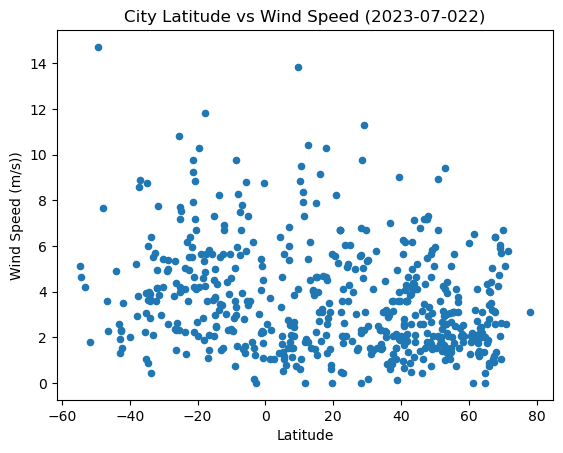

In [97]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter("Lat","Wind Speed")

# Incorporate the other graph properties
plt.xlabel ("Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.title("City Latitude vs Wind Speed (2023-07-022)");


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots
import seaborn


In [99]:
seaborn.regplot

<function seaborn.regression.regplot(data=None, *, x=None, y=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)>

In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.Lat >=0]

# Display rn data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yuzhno-kurilsk,44.0306,145.8556,14.60,97,99,4.12,RU,1690057696
2,udachny,66.4167,112.4000,20.25,55,12,3.99,RU,1690057696
3,iqaluit,63.7506,-68.5145,7.85,87,100,2.06,CA,1690057697
4,hamilton,39.1834,-84.5333,29.87,48,0,3.60,US,1690057474
7,jebrail,39.3992,47.0283,25.49,44,0,1.92,AZ,1690057698


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.Lat <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kencong,-8.2833,113.3667,20.96,85,81,1.60,ID,1690057696
5,tsiombe,-25.3000,45.4833,20.47,77,98,4.21,MG,1690057697
6,ushuaia,-54.8000,-68.3000,-0.19,80,75,5.14,AR,1690057698
11,west island,-12.1568,96.8225,24.99,78,83,6.69,CC,1690057699
14,quellon,-43.1167,-73.6167,7.14,81,40,2.57,CL,1690057700


###  Temperature vs. Latitude Linear Regression Plot

In [138]:
import scipy
r = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"]).rvalue
slope = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"]).slope
intercept = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"]).intercept
print('slope', slope)
print(intercept)

slope -0.26426139627925044
33.26161351929693


The r-value is: -0.6528462334149204


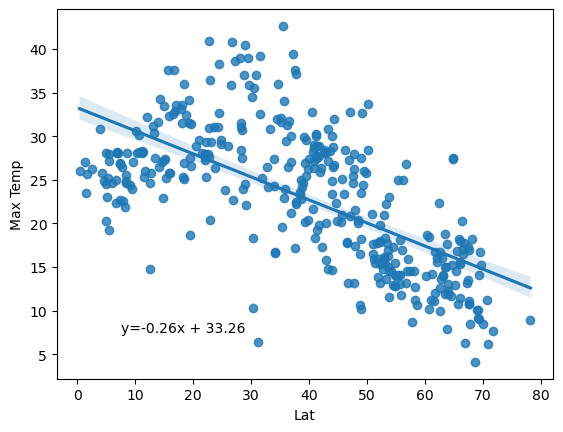

In [139]:
# Linear regression on Northern Hemisphere
seaborn.regplot(x ="Lat",y = "Max Temp", data = northern_hemi_df);
print("The r-value is:", r)
s = f"y={slope:.2}x + {intercept:.2f}"
plt.text(7.5, 7.5, s);

The r-value is: 0.7663529659749903


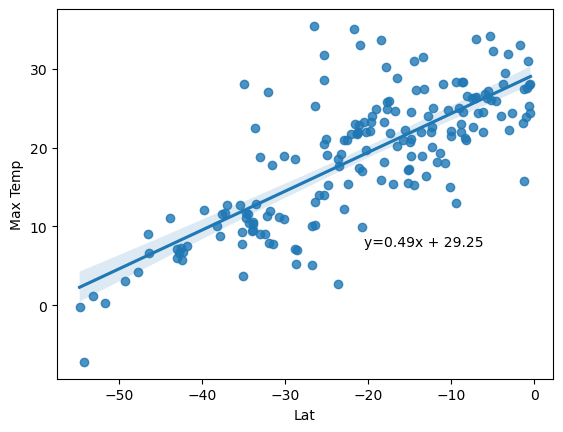

In [149]:
r = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"]).rvalue
slope = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"]).slope
intercept = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"]).intercept

# Linear regression on Northern Hemisphere
seaborn.regplot(x ="Lat",y = "Max Temp", data = southern_hemi_df);
print("The r-value is:", r)
s = f"y={slope:.2}x + {intercept:.2f}"
plt.text(-20.5, 7.5, s);

**Discussion about the linear relationship:** As you get further away from the equator, the temperatures get colder. In the Southern hemisphere the temperatures drop at an increased rate.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10936917387828855


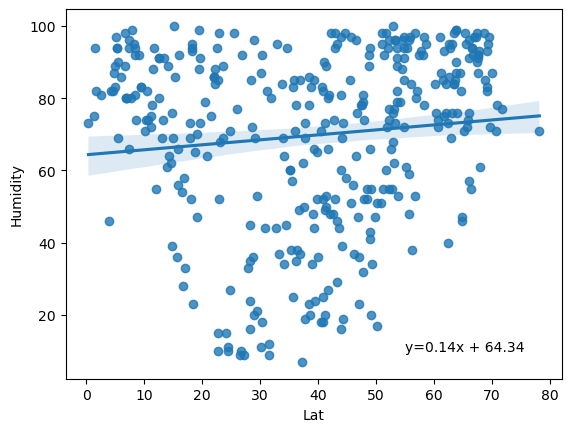

In [148]:
r = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"]).rvalue
slope = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"]).slope
intercept = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"]).intercept

# Linear regression on Northern Hemisphere
seaborn.regplot(x ="Lat",y = "Humidity", data = northern_hemi_df);
print("The r-value is:", r)
s = f"y={slope:.2}x + {intercept:.2f}"
plt.text(55, 10, s);

The r-value is: -0.19081547355533104


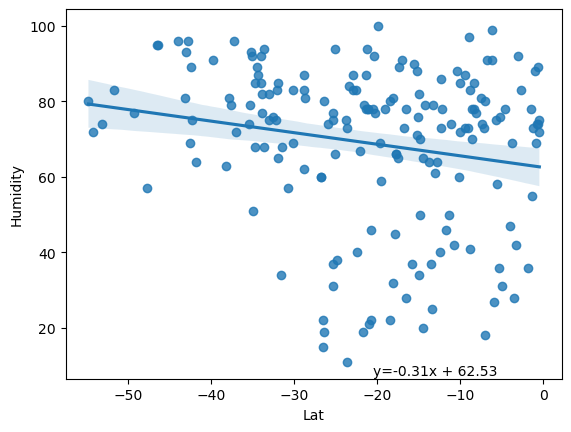

In [147]:
r = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"]).rvalue
slope = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"]).slope
intercept = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"]).intercept

# Linear regression on Northern Hemisphere
seaborn.regplot(x ="Lat",y = "Humidity", data = southern_hemi_df);
print("The r-value is:", r)
s = f"y={slope:.2}x + {intercept:.2f}"
plt.text(-20.5, 7.5, s);

**Discussion about the linear relationship:** In the Northern hemisphere, the furhter away from the equator the less humid it is. In the Southern hemisphere, the  closer to the equator you get, the less humid it gets.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.016977724605200074


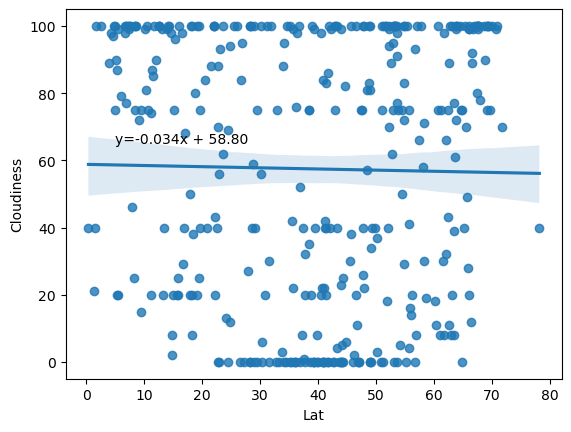

In [146]:
r = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"]).rvalue
slope = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"]).slope
intercept = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"]).intercept

# Linear regression on Northern Hemisphere
seaborn.regplot(x ="Lat",y = "Cloudiness", data = northern_hemi_df);
print("The r-value is:", r)
s = f"y={slope:.2}x + {intercept:.2f}"
plt.text(5, 65, s);

The r-value is: -0.06881378226492862


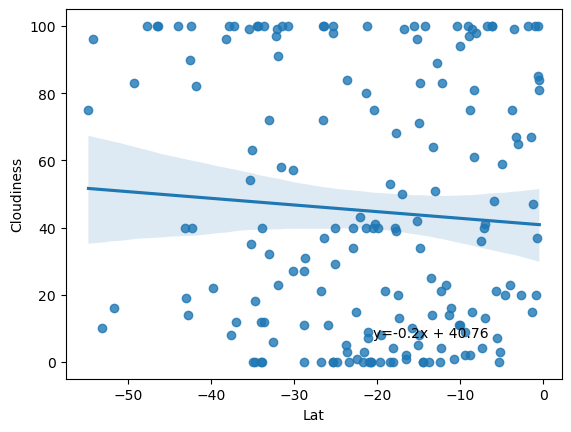

In [150]:
r = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"]).rvalue
slope = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"]).slope
intercept = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"]).intercept

# Linear regression on Northern Hemisphere
seaborn.regplot(x ="Lat",y = "Cloudiness", data = southern_hemi_df);
print("The r-value is:", r)
s = f"y={slope:.2}x + {intercept:.2f}"
plt.text(-20.5, 7.5, s);

**Discussion about the linear relationship:** The cloudiness in both hemispheres does not seem to vary by latitude much.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1137235482679114


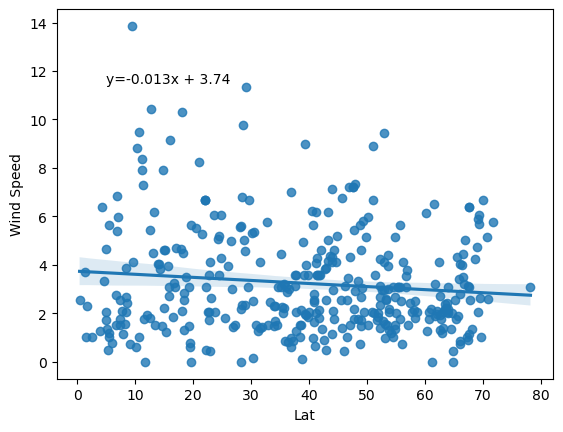

In [154]:
r = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"]).rvalue
slope = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"]).slope
intercept = scipy.stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"]).intercept

# Linear regression on Northern Hemisphere
seaborn.regplot(x ="Lat",y = "Wind Speed", data = northern_hemi_df);
print("The r-value is:", r)
s = f"y={slope:.2}x + {intercept:.2f}"
plt.text(5, 11.5, s);

The r-value is: -0.06011212992143169


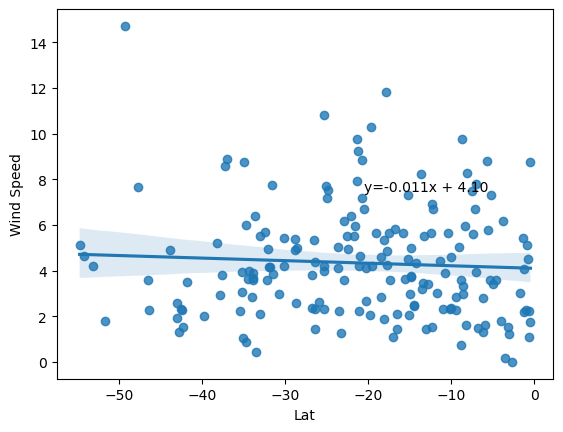

In [151]:
r = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"]).rvalue
slope = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"]).slope
intercept = scipy.stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"]).intercept

# Linear regression on Northern Hemisphere
seaborn.regplot(x ="Lat",y = "Wind Speed", data = southern_hemi_df);
print("The r-value is:", r)
s = f"y={slope:.2}x + {intercept:.2f}"
plt.text(-20.5, 7.5, s);

**Discussion about the linear relationship:** The change in windspeed based upon the latitudinal position is relevatively minimal.